# Ecommerce Orders
Dataset of ecommerce orders

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
order_log = pd.read_csv('Datasets/Ecommerce Purchases')

In [3]:
order_log.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [4]:
order_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


## Average Purchase Price

In [5]:
order_log['Purchase Price'].mean()

50.347302

## Highest Purchase Price

In [6]:
order_log['Purchase Price'].max()

99.99

## Lowest Purchase Price
The lowest purchase price in the dataset is `0.0`. In a real world application, this can occur with the use of vouchers or checkout of free tester kits.

In [7]:
order_log['Purchase Price'].min()

0.0

## Top 5 Credit Card Providers By Total Amount Purchased

In [8]:
cc_group = order_log.groupby('CC Provider')
cc_group['Purchase Price'].sum().sort_values(ascending=False).head()

CC Provider
VISA 16 digit       85528.86
JCB 16 digit        84597.33
JCB 15 digit        44376.60
Voyager             43085.77
American Express    42865.52
Name: Purchase Price, dtype: float64

## Mastercard Study
Finding specific information about mastercard.

###### Total amount of mastercard purchases

In [9]:
order_log[order_log['CC Provider']=='Mastercard']['Purchase Price'].sum()

40835.1

###### Average purchase price using mastercard

In [10]:
order_log[order_log['CC Provider']=='Mastercard']['Purchase Price'].mean()

50.04301470588235

###### Total number of mastercard transactions

In [11]:
len(order_log[order_log['CC Provider']=='Mastercard'])

816

###### Number of customers who use Mastercard and have made a purchase above $90?

In [12]:
len(order_log[(order_log['CC Provider']=='Mastercard') & (order_log['Purchase Price']>90)])

84

### All Credit Card Providers Study
Showing specific information side by side for easy comparison of all credit card providers used in transactions.

In [13]:
cc_group = order_log.groupby('CC Provider').agg(
    cc_sum = ('Purchase Price','sum'),
    cc_mean = ('Purchase Price','mean'),
    cc_count = ('Purchase Price','count')
)

In [14]:
cc_group

,cc_sum,cc_mean,cc_count
CC Provider,,,
American Express,42865.52,50.489423,849
Diners Club / Carte Blanche,37378.39,48.733233,767
Discover,42208.13,51.662338,817
JCB 15 digit,44376.60,51.125115,868
JCB 16 digit,84597.33,49.299143,1716
Maestro,42620.78,50.379173,846
Mastercard,40835.10,50.043015,816
VISA 13 digit,39976.54,51.449858,777
VISA 16 digit,85528.86,49.871055,1715


(45.0, 55.0)

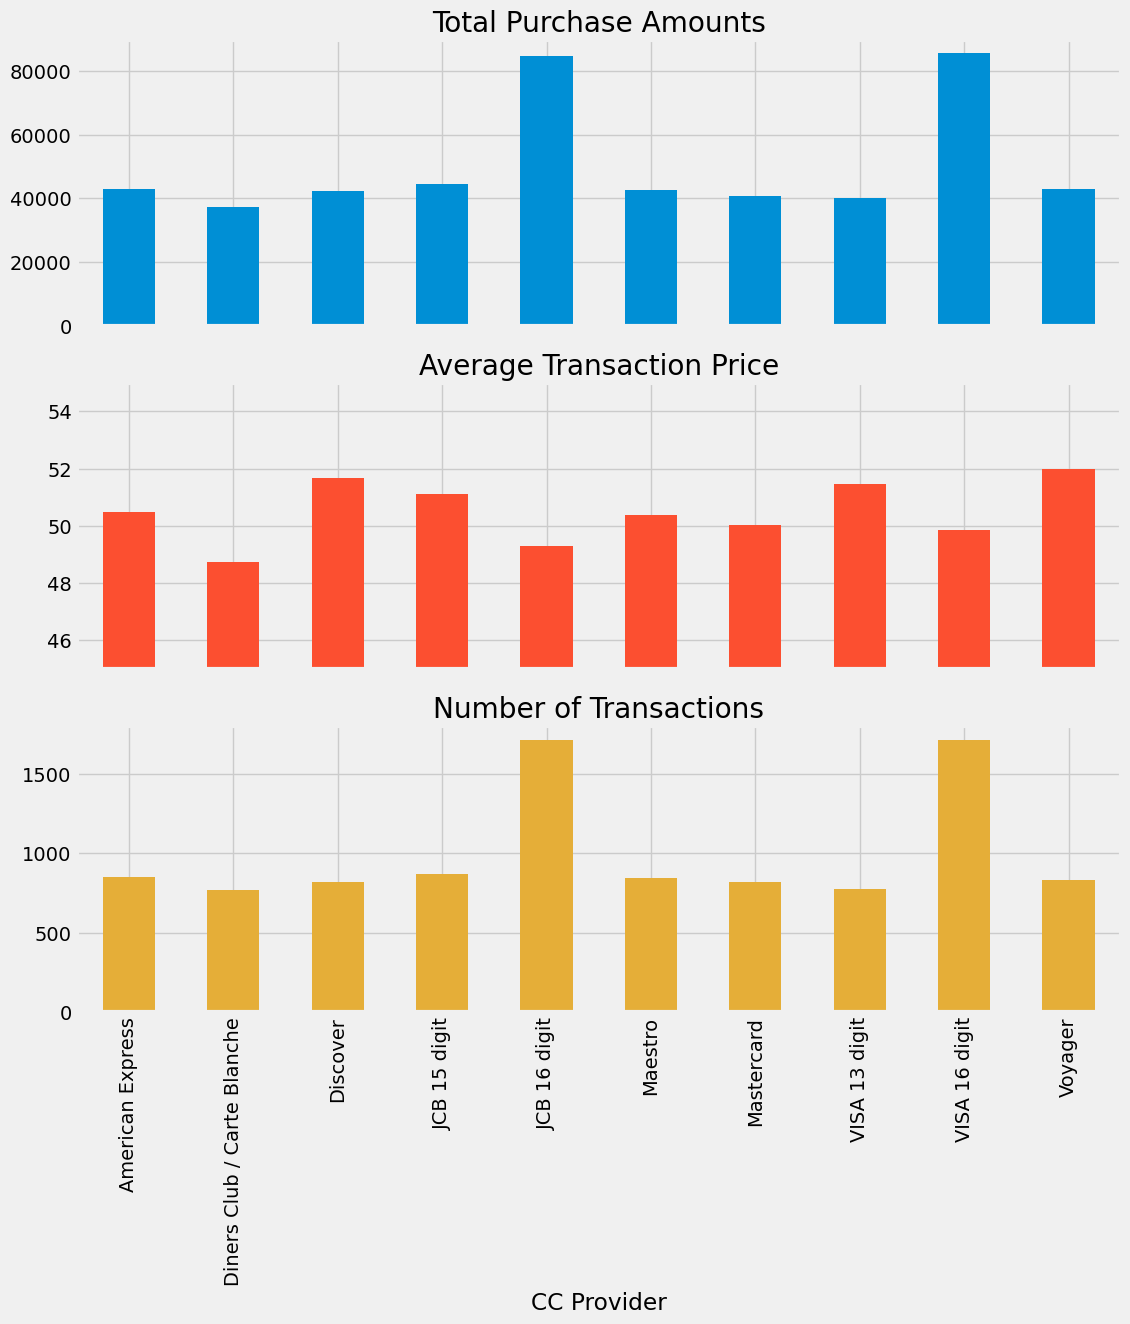

In [15]:
plt.style.use('fivethirtyeight')
fig = cc_group.plot.bar(subplots=True,legend=False,figsize=(12,12))
fig[0].set_title('Total Purchase Amounts')
fig[1].set_title('Average Transaction Price')
fig[2].set_title('Number of Transactions')

fig[1].set_ylim(45,55)

Notice that all cards have similar `Average Transaction Price` and that `JCB 16 digit` and `VISA 16 digit` are in the bottom three for this. However, they are the top two for `Total Purchase Amounts` because they are used for significantly more transactions as seen in `Number of Transactions`.

## Number of customers with their credit card expiring in 2024
Finding how many customers have their credit card expiring this 2024.

###### Method 1:

In [16]:
order_log['CC Exp Date'].str.contains('/24').sum()

992

###### Method 2:

In [17]:
sum(order_log['CC Exp Date'].apply(lambda exp: exp [3:]=='24'))

992

## Top 3 Languages
Finding what particular languages are most used by the customers when shopping.

In [18]:
order_log['Language'].value_counts().sort_values(ascending=False).head(3)

Language
de    1155
ru    1155
el    1137
Name: count, dtype: int64

###### Number of customers with English as choice of language
Finding how many customers have their language set to English.

In [19]:
len(order_log[order_log['Language']=='en'])

1098

## Number of orders made in the AM and in the PM
Comparing the count of orders made before noon and after noon.

In [20]:
order_log['AM or PM'].value_counts()

AM or PM
PM    5068
AM    4932
Name: count, dtype: int64

## Top 10 Most Common Customer Jobs

In [21]:
order_log['Job'].value_counts().head(10)

Job
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Designer, jewellery                  27
Research officer, political party    27
Charity fundraiser                   26
Designer, fashion/clothing           26
Social worker                        26
Dietitian                            26
Name: count, dtype: int64

###### Number of customers who are lawyers
Finding how many customers have indicated they are lawyers.

In [22]:
len(order_log[order_log['Job']=='Lawyer'])

30

## Order Finding
Find rows based on some criteria

###### 1. Based on lot: 90 WT
Retrieving information available for the order made with a specific lot.

In [23]:
order_log[order_log['Lot']=='90 WT']

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
513,"50398 Mccoy Rest Suite 597\nSouth Garyborough,...",90 WT,AM,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...,Bright PLC,630438419693,11/19,173,American Express,jesse00@page.net,Energy engineer,156.70.208.94,ru,75.1


###### 2. Based on credit card number: 4926535242672853
Retrieving the Email address available for the order made with a specific credit card number.

In [24]:
order_log[order_log['Credit Card']==4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

## Top 5 Most Common Email Providers

###### Method 1:

In [25]:
order_log['Email_host'] = order_log['Email'].str.split('@').str[1]
order_log['Email_host'].value_counts().head()

Email_host
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64

###### Method 2:

In [26]:
order_log['Email'].apply(lambda email: email.split('@')[1]).value_counts().head()

Email
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64